#Configurar

Directorio raiz. Debe tenr una subcarpeta que se llame _Datasets_.

In [1]:
dir_raiz = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/'

Códigos de coberturas de nubes.

In [2]:
cods_cob_nubes = [99]

Radios de las vecindades definidos para la investigación. Siempre incluir el cero (0).

In [57]:
radios = [0,10]

Nombre de la capa de inclinación, sin extensión.

In [4]:
nom_slp = 'slope_degrees_final'

Proporción de ejemplos del dataset dedicados para realizar test. Núemro entre 0 y 1.

In [5]:
test_size = 0.2

Semilla para replicar los conjuntos de datos generados.

In [6]:
semilla = 12345

#0. Entorno

In [7]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [8]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

In [9]:
# explorar archivos
import glob
import os

In [10]:
import pandas as pd

In [11]:
# histograma
from matplotlib import pyplot as plt
# barplot
import seaborn as sns

Para hacer gráficas dinámicas.

In [12]:
import plotly.express as px

Para trabajar datos matriciales

In [13]:
import numpy as np
np.version.version # versioon utilizada y funcional dentro de este notebook

'1.22.4'

Para escribir el dataset en Drive y en un .csv

In [14]:
import csv

Para tomar el tiempo de entrenamiento.

In [15]:
from datetime import datetime

Para generar aleatoriamente el conjunto de datos de Entrenaimento y Prueba.

In [16]:
import random
random.seed(semilla)

#1. Importar

**Drivers**

Extrae la ruta de los tifs de las capas.

In [17]:
drivers_dirs = glob.glob(os.path.join(dir_raiz,"Drivers/*.tif"))

Se importan los rásters.

In [18]:
for dir in drivers_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [19]:
drivers_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in drivers_dirs ])

---

**Constrains**

Extrae la ruta de los tifs de las capas.

In [20]:
constrs_dirs = glob.glob(os.path.join(dir_raiz,"Constrains/*.tif"))

Se importan los rásters.

In [21]:
for dir in constrs_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [22]:
constrs_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in constrs_dirs ])

---

**Coberturas**

Extrae la ruta de los tifs de las capas.

In [23]:
cob_dirs = glob.glob(os.path.join(dir_raiz,"Coberturas/*.tif"))

Se importan los rásters.

In [24]:
for dir in cob_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [25]:
cob_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in cob_dirs ])

#2. Explorar

**Drivers**

Se exploran los rásters de los Drivers.

In [26]:
drivers_nams

['centro_poblados_cabeceras_proximity',
 'dem_argelia',
 'drenaje_senc_proximity',
 'slope_degrees_final',
 'vias_proximity']

In [27]:
slope_degrees_final[slope_degrees_final < 0] = 0

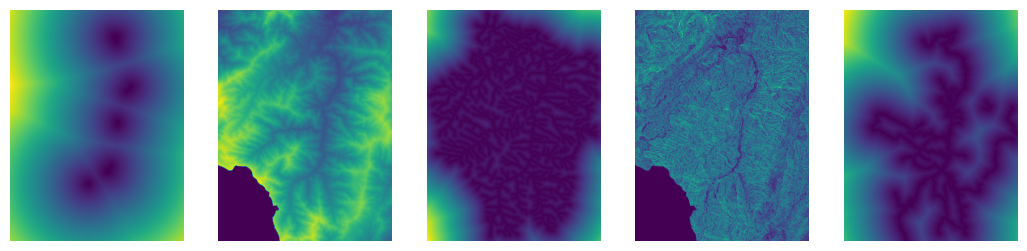

In [28]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [29]:
for nom in drivers_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

centro_poblados_cabeceras_proximity:
(3362, 2526)
 
dem_argelia:
(3362, 2526)
 
drenaje_senc_proximity:
(3362, 2526)
 
slope_degrees_final:
(3362, 2526)
 
vias_proximity:
(3362, 2526)
 


In [30]:
#f, (a1,a2,a3,a4,a5) = plt.subplots(1, 5, figsize=(13,13))

#a1.imshow(dem_argelia)
#a1.axis('off')
#a2.imshow(slope_degrees_final)
#a2.axis('off')
#a3.imshow(centro_poblados_cabeceras_proximity)
#a3.axis('off')
#a4.imshow(drenaje_senc_proximity)
#a4.axis('off')
#a5.imshow(vias_proximity)
#a5.axis('off')

#f.show()

In [31]:
#plt.figure(figsize=(13,2))
#for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  #plt.subplot(1,len(drivers_nams),n+1)
  #ax = px.histogram( choice(locals()[nom].ravel(),size=6500000,replace=False) , nbins=20 )
  #ax
#plt.show()

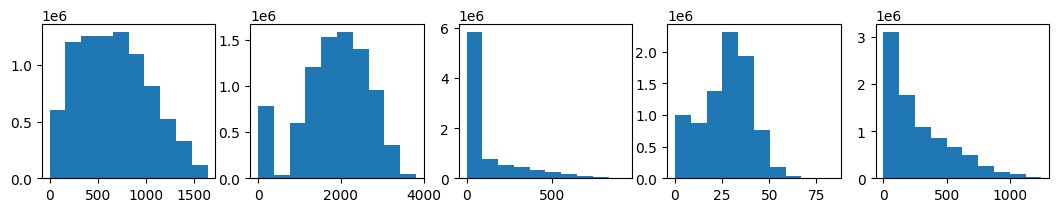

In [32]:
plt.figure(figsize=(13,2))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.hist(locals()[ nom ].ravel())
  ax
plt.show()

---

**Constrains**

In [33]:
constrs_nams

['mpio_mask_binario', 'raster_ambiental_binario', 'raster_comunitario_binario']

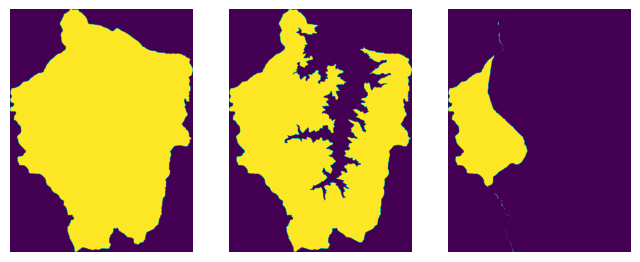

In [34]:
plt.figure(figsize=(8,8))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [35]:
for nom in constrs_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

mpio_mask_binario:
(3362, 2526)
 
raster_ambiental_binario:
(3362, 2526)
 
raster_comunitario_binario:
(3362, 2526)
 


In [36]:
for nom in constrs_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts() )  
  print( ' ' )

mpio_mask_binario:
1    5415641
0    3076771
Name: valores, dtype: int64
 
raster_ambiental_binario:
1    4253873
0    4238539
Name: valores, dtype: int64
 
raster_comunitario_binario:
0    7515885
1     976527
Name: valores, dtype: int64
 


CÓDIGO DE COBERTURAS QUE SON NUBES! HAY QUE INCLUIRLAS EN LOS CONSTRAINS:

*   2000 - 99
*   2005 - 6986,10198,10202,10203
*   2010 - (no hay)
*   2015 - (no está el metadato)

In [37]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']

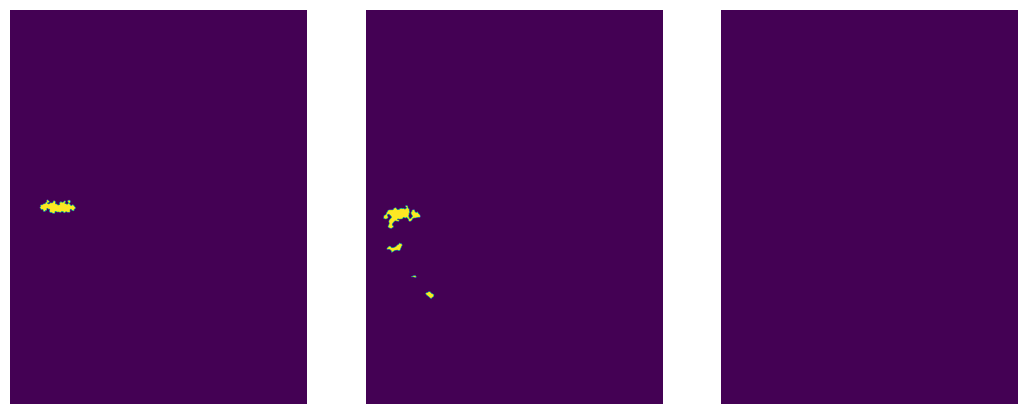

In [38]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow( np.isin(locals()[ nom ], cods_cob_nubes ) )
  plt.axis('off')
  ax
plt.show()

In [39]:
#raster_nubes_binario = np.zeros( locals()[cob_nams[0]].shape ).astype('int')
#for nom in cob_nams:
#  raster_nubes_binario = raster_nubes_binario | np.isin(locals()[nom], cods_cob_nubes ).astype('int')

#constrs_nams.append('raster_nubes_binario')
#ax = plt.imshow( raster_nubes_binario )
#plt.axis('off')
#ax
#plt.show()

---

**Coberturas**

In [40]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']

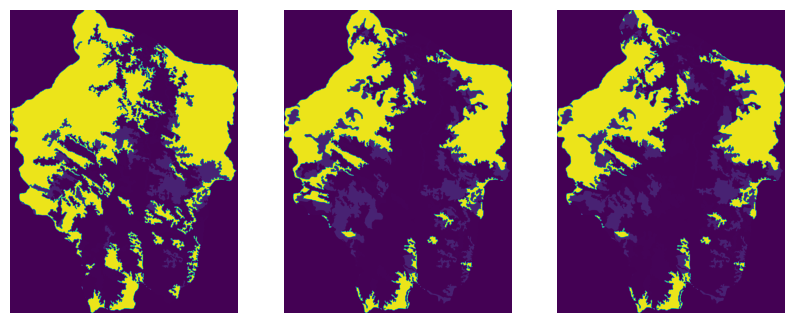

In [41]:
plt.figure(figsize=(10,10))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [42]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']

In [43]:
for nom in cob_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index() )  
  print( ' ' )

cob_1_2000_2002:
valores
0          3076771
99           20261
111           3634
231         288792
233          60559
242         138238
243         673320
244         766599
245           9329
323         336780
334          33305
511          13044
3131        283284
3132        123693
3221          7844
31111      2654756
32111         2203
dtype: int64
 
cob_2_2005_2009:
valores
0          3076771
99           30637
111           5216
231         440484
233          53950
241          12504
242         448591
243         880941
244         661206
245          92241
323         231132
511          13028
3131        155457
3132        562243
3221         20020
3231         15421
31111      1786716
32111         5854
dtype: int64
 
cob_3_2010_2012:
valores
0          3076771
111           5216
231         145853
232            608
233         218037
242         330657
243        1079846
244         574358
245          58636
323         471066
511          13028
3131        184817
31

In [47]:
s = pd.DataFrame(locals()[ cob_nams[0] ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame()

for nom in cob_nams[1:]:
  s = pd.merge( s , pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s

,0_x,0_y,0
valores,,,
0,3076771.0,3076771.0,3076771.0
99,20261.0,30637.0,NaN
111,3634.0,5216.0,5216.0
231,288792.0,440484.0,145853.0
232,NaN,NaN,608.0
233,60559.0,53950.0,218037.0
241,NaN,12504.0,NaN
242,138238.0,448591.0,330657.0
243,673320.0,880941.0,1079846.0


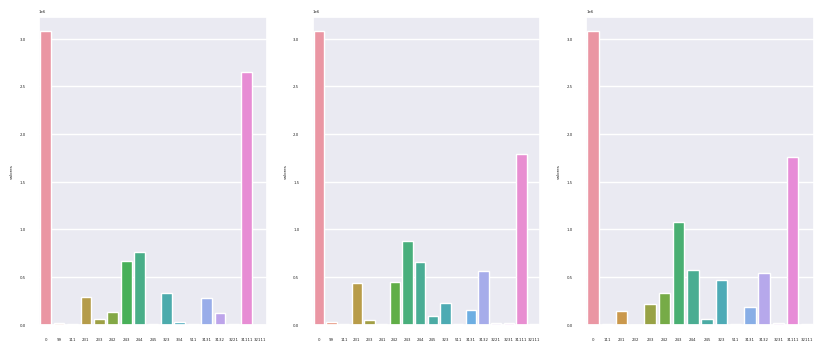

In [45]:
sns.set(font_scale=0.25)
plt.figure(figsize=(10,4))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  d = pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts()
  sns.barplot(x=d.index, y=d)
plt.show()

In [46]:
for nom in cob_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

cob_1_2000_2002:
(3362, 2526)
 
cob_2_2005_2009:
(3362, 2526)
 
cob_3_2010_2012:
(3362, 2526)
 


---

#3. Escenarios y periodos

Escenarios

In [48]:
constrs_nams.remove('mpio_mask_binario')

constrains_binario = np.invert( locals()[constrs_nams[0]] )
for n in range(len(constrs_nams)):
  constrains_binario = constrains_binario & np.invert( locals()[constrs_nams[n]] )
constrains_binario = constrains_binario & locals()['mpio_mask_binario']

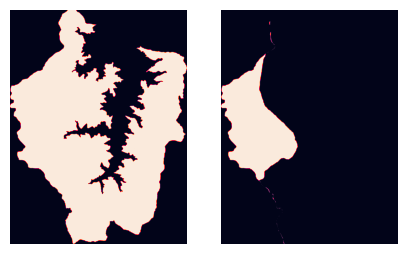

In [49]:
plt.figure(figsize=(5,5))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

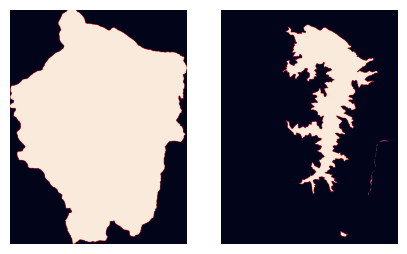

In [50]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
ax = plt.imshow(mpio_mask_binario)
plt.axis('off')
ax
plt.subplot(1,2,2)
ax = plt.imshow(constrains_binario)
plt.axis('off')
ax
plt.show()

Nombres de las capas de los rásters booleanos de los escenarios del estudio:
1.   Municipio completo
2.   Municipio con delimitación para el uso del suelo

In [51]:
esc_nams = ['mpio_mask_binario','constrains_binario']

#4. Índices para construcción de datasets

Lista de los números de periodo actual.

In [58]:
inter_periodos = range(len(cob_nams)-1)
num_per = len(cob_nams)
print(cob_nams,)
print(inter_periodos,)
print(num_per)

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']
range(0, 2)
3


Número de filas y columnas del área de estudio.

In [59]:
filas = range(mpio_mask_binario.shape[0])
columnas = range(mpio_mask_binario.shape[1])

Lista con códigos de coberturas en todos los periodos.

In [60]:
cob_cods = []
for nom in cob_nams:
  cob_cods.extend(list(set(locals()[nom].ravel().tolist())))
cob_cods = sorted(list(set(cob_cods)))
cob_cods.remove(99)
cob_cods.remove(0)
print(cob_cods,)

[111, 231, 232, 233, 241, 242, 243, 244, 245, 323, 334, 511, 3131, 3132, 3221, 3231, 31111, 32111]


Nombres de las características extraidas y su cantidad.

In [61]:
feature_nams = ['dr_'+d[:5] for d in drivers_nams] + ['slp_mean_'+str(r) for r in radios if r!=0] + ['SI_cVt_'+str(r)+'_'+str(c) for r in radios for c in cob_cods ]
print(feature_nams,)

['dr_centr', 'dr_dem_a', 'dr_drena', 'dr_slope', 'dr_vias_', 'slp_mean_10', 'SI_cVt_0_111', 'SI_cVt_0_231', 'SI_cVt_0_232', 'SI_cVt_0_233', 'SI_cVt_0_241', 'SI_cVt_0_242', 'SI_cVt_0_243', 'SI_cVt_0_244', 'SI_cVt_0_245', 'SI_cVt_0_323', 'SI_cVt_0_334', 'SI_cVt_0_511', 'SI_cVt_0_3131', 'SI_cVt_0_3132', 'SI_cVt_0_3221', 'SI_cVt_0_3231', 'SI_cVt_0_31111', 'SI_cVt_0_32111', 'SI_cVt_10_111', 'SI_cVt_10_231', 'SI_cVt_10_232', 'SI_cVt_10_233', 'SI_cVt_10_241', 'SI_cVt_10_242', 'SI_cVt_10_243', 'SI_cVt_10_244', 'SI_cVt_10_245', 'SI_cVt_10_323', 'SI_cVt_10_334', 'SI_cVt_10_511', 'SI_cVt_10_3131', 'SI_cVt_10_3132', 'SI_cVt_10_3221', 'SI_cVt_10_3231', 'SI_cVt_10_31111', 'SI_cVt_10_32111']


In [62]:
len(feature_nams)

42

#5. Escribir planos datasets en disco sesión

Crea los directorios en los que se van a distribuir los datasets.

In [63]:
!mkdir completo
!mkdir completo/train
!mkdir completo/test
!mkdir completo/ajustefinal

!mkdir condicionado
!mkdir condicionado/train
!mkdir condicionado/test
!mkdir condicionado/ajustefinal

Se extrae una tabla con los nombres de los features extraidos, es decir, los encabezados de la tabla de _X_.

In [64]:
with open( '/content/features.csv','a',newline='' ) as f:
  w1 = csv.writer(f)
  w1.writerow( feature_nams )

Se va a iterar a través de tres índices:

1. Periodos de estudio según los rásters disponibles de coberturas
2. Coordenadas del área de estudio
3. Escenarios

Se extraen dos (2) diferentes tablas de datos por unidad de análisis: _y_ y _X_, por cada uno de las (2) particiones mas (1) sin partición: _Train_ y _Test_ y _ajuste final_, así como por cada uno de las dos (2) escenarios: _completo_ y _condicionado_. En total se escriben doce (12) tablas.

In [65]:
cont = 0

# conexioon a los planos escritos en la sesioon de colab
with open( '/content/completo/train/y.csv','a',newline='' ) as co1_y:
  comptr_y = csv.writer(co1_y)
  with open( '/content/completo/train/X.csv','a',newline='' ) as co1_X:
    comptr_X = csv.writer(co1_X)
    with open( '/content/condicionado/train/y.csv','a',newline='' ) as cn1_y:
      constr_y = csv.writer(cn1_y)
      with open( '/content/condicionado/train/X.csv','a',newline='' ) as cn1_X:
        constr_X = csv.writer(cn1_X)

        with open( '/content/completo/test/y.csv','a',newline='' ) as co0_y:
          compts_y = csv.writer(co0_y)
          with open( '/content/completo/test/X.csv','a',newline='' ) as co0_X:
            compts_X = csv.writer(co0_X)
            with open( '/content/condicionado/test/y.csv','a',newline='' ) as cn0_y:
              consts_y = csv.writer(cn0_y)
              with open( '/content/condicionado/test/X.csv','a',newline='' ) as cn0_X:
                consts_X = csv.writer(cn0_X)

                with open( '/content/completo/ajustefinal/y.csv','a',newline='' ) as aj1_y:
                  compaj_y = csv.writer(aj1_y)
                  with open( '/content/completo/ajustefinal/X.csv','a',newline='' ) as aj1_X:
                    compaj_X = csv.writer(aj1_X)
                    with open( '/content/condicionado/ajustefinal/y.csv','a',newline='' ) as aj0_y:
                      consaj_y = csv.writer(aj0_y)
                      with open( '/content/condicionado/ajustefinal/X.csv','a',newline='' ) as aj0_X:
                        consaj_X = csv.writer(aj0_X)

                        # se itera en el tiempo y el espacio
                        for t in inter_periodos:
                          for i in filas:
                            for j in columnas:

                              # se imprime el avance de la tarea
                              if cont % 1000000 == 0:
                                print(
                                  datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "-" ,
                                  str(round(100*cont/(len(inter_periodos)*len(filas)*len(columnas)),0)) , "%"
                                )
                              cont += 1

                              # se verifica que la ubicación haga parte del escenario completo
                              # se verifica que no haya nubes en el periodo t
                              if locals()[esc_nams[0]][i,j] == 1 and locals()[cob_nams[t]][i,j] not in cods_cob_nubes:

                                # se verifica que no se tome el uultimo periodo para el ajuste del modelo
                                if t < num_per-1:

                                  # se extrae la cobertura en el espacio y tiempo
                                  y = locals()[cob_nams[t+1]][i,j]

                                  # se verifica que la cobertura extraida no es nube
                                  if y not in cods_cob_nubes:
                                    
                                    # se extraen los features
                                    feat_vals = [] 
                                    for d in drivers_nams:
                                      feat_vals.append( locals()[d][i,j] )
                                    for r in radios:
                                      if r != 0:
                                        cx0 = int(np.where((i-r)<0,0,(i-r)))
                                        cx1 = i+r+1
                                        cy0 = int(np.where((j-r)<0,0,(j-r)))
                                        cy1 = j+r+1
                                        feat_vals.append( np.mean( locals()[nom_slp][cx0:cx1,cy0:cy1] ) )
                                    for r in radios:
                                      if r == 0:
                                        for c in cob_cods:
                                          feat_vals.append( int( locals()[cob_nams[t]][i,j] == c ) )
                                      else:
                                        for c in cob_cods:
                                          cx0 = int(np.where((i-r)<0,0,(i-r)))
                                          cx1 = i+r+1
                                          cy0 = int(np.where((j-r)<0,0,(j-r)))
                                          cy1 = j+r+1
                                          feat_vals.append( np.sum( locals()[cob_nams[t]][cx0:cx1,cy0:cy1] == c ) )

                                    # se escribe todo en el dataset de ajuste final, escenario completo
                                    compaj_y.writerow( [ y ] )
                                    compaj_X.writerow( feat_vals )

                                    # se asigna el ejemplo a entrenamiento o prueba de forma aleatoria
                                    # en el escenario completo
                                    if random.choices([True,False], weights=(1-test_size,test_size))[0]:
                                      comptr_y.writerow( [ y ] )
                                      comptr_X.writerow( feat_vals )
                                    else:
                                      compts_y.writerow( [ y ] )
                                      compts_X.writerow( feat_vals )

                                    # se verifica que la ubicacioon hace parte del escenario condicionado
                                    if locals()[esc_nams[1]][i,j]==1:

                                      # se escribe todo en el dataset de ajuste final, escenario cndicionado
                                      consaj_y.writerow( [ y ] )
                                      consaj_X.writerow( feat_vals )

                                      # se asigna el ejemplo a entrenamiento o prueba de forma aleatoria
                                      # en el escenario condicionado
                                      if random.choices([True,False], weights=(1-test_size,test_size))[0]:
                                        constr_y.writerow( [ y ] )
                                        constr_X.writerow( feat_vals )
                                      else:
                                        consts_y.writerow( [ y ] )
                                        consts_X.writerow( feat_vals )

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "- 100.0 %" )

15/05/2023 14:09:47 - 0.0 %
15/05/2023 14:11:33 - 6.0 %
15/05/2023 14:16:33 - 12.0 %
15/05/2023 14:24:00 - 18.0 %
15/05/2023 14:31:47 - 24.0 %
15/05/2023 14:38:49 - 29.0 %
15/05/2023 14:45:06 - 35.0 %
15/05/2023 14:49:58 - 41.0 %
15/05/2023 14:53:40 - 47.0 %
15/05/2023 14:54:56 - 53.0 %
15/05/2023 14:58:12 - 59.0 %
15/05/2023 15:04:53 - 65.0 %
15/05/2023 15:12:54 - 71.0 %
15/05/2023 15:20:30 - 77.0 %
15/05/2023 15:27:29 - 82.0 %
15/05/2023 15:33:02 - 88.0 %
15/05/2023 15:37:18 - 94.0 %
15/05/2023 15:39:46 - 100.0 %


#6. Exportar a Google Drive

In [66]:
%%capture
!cp /content/features.csv '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'
!cp -R /content/completo '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'
!cp -R /content/condicionado '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'